In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("D:/LAP TRINH/DS102.P21.2/LAB_2/data.csv", sep = ';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Normalizing data

In [4]:
normalized_data = data.copy()

In [5]:
continous_features = []
for col in data.columns:
    if data[col].dtype == 'float64':
        continous_features.append(col)

continous_features

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [6]:
for col in continous_features:
    normalized_data[col] = (normalized_data[col] - normalized_data[col].mean()) / normalized_data[col].std()

normalized_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,Dropout
1,1,15,1,9254,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,Graduate
2,1,1,5,9070,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,Dropout
3,1,17,2,9773,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,Graduate
4,2,39,1,8014,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,-0.577276,1,1,1,...,0,6,8,5,0.467578,0,1.476757,1.136876,-1.789464,Graduate
4420,1,1,2,9773,1,1,-0.956399,105,1,1,...,0,6,6,2,0.147730,0,-0.174987,-0.454201,0.889026,Dropout
4421,1,1,1,9500,1,1,1.621637,1,37,37,...,0,8,9,1,0.627502,0,0.876123,-1.105097,0.347160,Dropout
4422,1,1,1,9147,1,1,3.593077,1,37,37,...,0,5,6,5,0.339639,0,-0.813161,-1.466705,-1.375356,Graduate


In [7]:
course_id ={}
i = 1
for id in normalized_data['Course'].unique():
    course_id[id] = i
    i+=1

course_id

{np.int64(171): 1,
 np.int64(9254): 2,
 np.int64(9070): 3,
 np.int64(9773): 4,
 np.int64(8014): 5,
 np.int64(9991): 6,
 np.int64(9500): 7,
 np.int64(9238): 8,
 np.int64(9670): 9,
 np.int64(9853): 10,
 np.int64(9085): 11,
 np.int64(9130): 12,
 np.int64(9556): 13,
 np.int64(9147): 14,
 np.int64(9003): 15,
 np.int64(33): 16,
 np.int64(9119): 17}

In [8]:
def convert_coures_id(id: int) -> int:
    return course_id[id]

normalized_data['Course'] = normalized_data['Course'].apply(convert_coures_id)

normalized_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,1,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,Dropout
1,1,15,1,2,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,Graduate
2,1,1,5,3,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,Dropout
3,1,17,2,4,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,Graduate
4,2,39,1,5,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,4,1,1,-0.577276,1,1,1,...,0,6,8,5,0.467578,0,1.476757,1.136876,-1.789464,Graduate
4420,1,1,2,4,1,1,-0.956399,105,1,1,...,0,6,6,2,0.147730,0,-0.174987,-0.454201,0.889026,Dropout
4421,1,1,1,7,1,1,1.621637,1,37,37,...,0,8,9,1,0.627502,0,0.876123,-1.105097,0.347160,Dropout
4422,1,1,1,14,1,1,3.593077,1,37,37,...,0,5,6,5,0.339639,0,-0.813161,-1.466705,-1.375356,Graduate


In [9]:
normalized_data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [10]:
def encoder_target(value: str)-> int:
    if value == "Dropout":
        return 0
    if value == "Enrolled":
        return 1
    if value == "Graduate":
        return 2

In [11]:
normalized_data['Target'] = normalized_data['Target'].apply(encoder_target)
normalized_data['Target']


0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64

In [12]:
normalized_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,1,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
1,1,15,1,2,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,2
2,1,1,5,3,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
3,1,17,2,4,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,2
4,2,39,1,5,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,4,1,1,-0.577276,1,1,1,...,0,6,8,5,0.467578,0,1.476757,1.136876,-1.789464,2
4420,1,1,2,4,1,1,-0.956399,105,1,1,...,0,6,6,2,0.147730,0,-0.174987,-0.454201,0.889026,0
4421,1,1,1,7,1,1,1.621637,1,37,37,...,0,8,9,1,0.627502,0,0.876123,-1.105097,0.347160,0
4422,1,1,1,14,1,1,3.593077,1,37,37,...,0,5,6,5,0.339639,0,-0.813161,-1.466705,-1.375356,2


SOFTMAX REGRESSION

In [13]:
from logging import logProcesses
from tqdm import tqdm

class SoftmaxRegression:
    def __init__(self, epoch: int = 1000, lr: float = 0.01) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
        self.theta = None

    def softmax(self, z: np.ndarray) -> np.ndarray:
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Tránh overflow
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return -np.mean(np.sum(y * np.log(y_hat + 1e-6), axis=1))

    def accuracy(self, y: np.ndarray, y_pre: np.ndarray) -> float:
       return (1 - np.abs(y-y_pre)).mean()

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n, d = X.shape
        n_classes = y.shape[-1]
        self.theta = np.zeros((d, n_classes), dtype=np.float64)

        with tqdm(range(self.epoch)) as pb:
            for e in pb:
                s = self.predict(X)
                s_c = s - y  # Gradient descent update
                gradient = (1 / n) * np.dot(X.T, s_c)
                self.theta -= self.lr * gradient

                # Evaluate performance
                s = self.predict(X)
                loss = self.loss_fn(y, s)
                acc = self.accuracy(y.argmax(axis=-1), s.argmax(axis=-1))

                pb.set_postfix({"loss": loss, "acc": acc})
                self.losses.append(loss)
                self.metrics.append(acc)

    def predict(self, X: np.ndarray) -> np.ndarray:
        logits = np.dot(X, self.theta)
        return self.softmax(logits)

In [14]:
# Chuyển đổi nhãn thành One-Hot Encoding
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

In [15]:
X_Y = normalized_data.to_numpy()

In [16]:
X_Y_train, X_Y_test = np.split(X_Y, indices_or_sections=[int(0.8*data.shape[0])])

X_train = X_Y_train[:,:-1]
Y_train = X_Y_train[:,-1]

X_test = X_Y_test[:,:-1]
Y_test = X_Y_test[:,-1]

In [17]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

Y_train = Y_train.astype(np.int64)
Y_test = Y_test.astype(np.int64)


In [18]:
y_one_hot = one_hot_encode(Y_train, num_classes=3)

In [19]:
model = SoftmaxRegression(1000,0.01)
model.fit(X_train,y_one_hot)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:03<00:00, 330.85it/s, loss=1.53, acc=0.641]


In [20]:
predicted = model.predict(X_test)
Y_test_one_hot = np.eye(len(np.unique(Y_test)))[Y_test]
print('Accuracy: ', model.accuracy(Y_test_one_hot, predicted))

Accuracy:  0.812696102277098


C:\Users\Thy\AppData\Local\Temp\ipykernel_25028\48023919.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


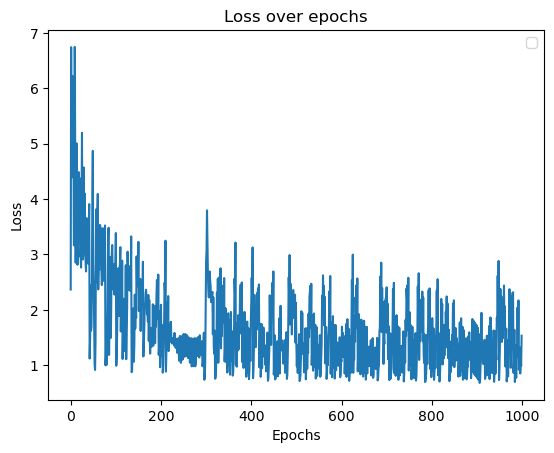

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(len(model.losses)), model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over epochs")
plt.legend()
plt.show()